
# Importing Libraries

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation

# Importing Dataset

In [32]:
data = pd.read_csv('ADANIPORTS.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,27-11-2007,770.00,1050.00,770.0,962.90,27294366
1,28-11-2007,984.00,990.00,874.0,893.90,4581338
2,29-11-2007,909.00,914.75,841.0,884.20,5124121
3,30-11-2007,890.00,958.00,890.0,921.55,4609762
4,03-12-2007,939.75,995.00,922.0,969.30,2977470


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3322 non-null   object 
 1   Open    3322 non-null   float64
 2   High    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   Close   3322 non-null   float64
 5   Volume  3322 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 155.8+ KB


# Changing the data type from object to float for "close" column

In [34]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3322 non-null   object 
 1   Open    3322 non-null   float64
 2   High    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   Close   3322 non-null   float64
 5   Volume  3322 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 155.8+ KB


# Normalizing the Dataset

In [36]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(3322, 1)

# Creating X_train and y_train Data Structures

In [37]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

# Reshape the Data

In [38]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [39]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [40]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 21s - loss: 0.0149 - 21s/epoch - 606ms/step
Epoch 2/20
35/35 - 6s - loss: 0.0056 - 6s/epoch - 182ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0044 - 6s/epoch - 178ms/step
Epoch 4/20
35/35 - 6s - loss: 0.0036 - 6s/epoch - 178ms/step
Epoch 5/20
35/35 - 6s - loss: 0.0038 - 6s/epoch - 181ms/step
Epoch 6/20
35/35 - 6s - loss: 0.0031 - 6s/epoch - 179ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0027 - 6s/epoch - 178ms/step
Epoch 8/20
35/35 - 6s - loss: 0.0027 - 6s/epoch - 179ms/step
Epoch 9/20
35/35 - 6s - loss: 0.0027 - 6s/epoch - 178ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0034 - 6s/epoch - 178ms/step
Epoch 11/20
35/35 - 6s - loss: 0.0024 - 6s/epoch - 179ms/step
Epoch 12/20
35/35 - 6s - loss: 0.0026 - 6s/epoch - 179ms/step
Epoch 13/20
35/35 - 6s - loss: 0.0024 - 6s/epoch - 178ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0024 - 6s/epoch - 179ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0023 - 6s/epoch - 178ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0022 - 6s/epoch - 178ms/step
Epoch 17/20
35/

# Preparing the Input for the Model

In [41]:
testData = pd.read_csv('ADANIPORTS.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(3262, 60, 1)

# Predicting the Values

In [42]:
y_pred = model.predict(X_test)
y_pred

102/102 [==============================] - 9s 60ms/step


array([[0.46343997],
       [0.47796476],
       [0.48511043],
       ...,
       [0.46208596],
       [0.46942565],
       [0.4768275 ]], dtype=float32)

In [43]:
predicted_price = sc.inverse_transform(y_pred)

# Plotting the Actual and Predicted Prices

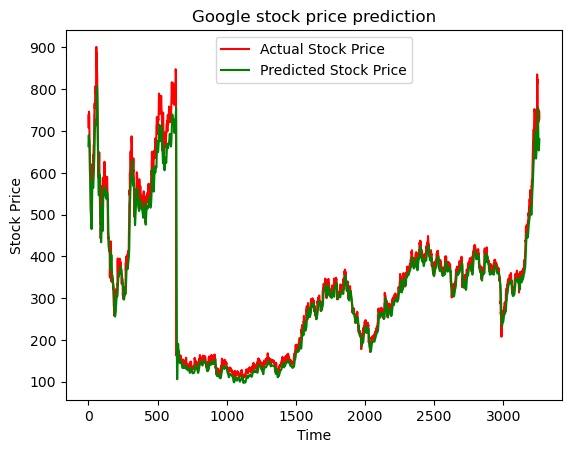

In [44]:
  plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()